In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import pgeocode 
import folium
import numpy as np

In [88]:
rating_df = pd.read_csv("../data/raw/ml-100k/u.data", sep="\t", index_col=False, names=["userID", "itemID", "rating"])

C:\Users\freid\AppData\Local\Temp\ipykernel_25268\3954796181.py:3: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  rating_df = pd.read_csv("../data/raw/ml-100k/u.data", sep="\t", index_col=False, names=["userID", "itemID", "rating"])


In [89]:
rating_df.head(10)

,userID,itemID,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1
5,298,474,4
6,115,265,2
7,253,465,5
8,305,451,3
9,6,86,3


In [122]:
movie_df = pd.read_csv("../data/raw/ml-100k/u.item", sep="|", index_col=False,
                       names=["itemID", "movie title"], encoding="latin1")
movie_df.set_index("itemID", inplace=True)
movie_df.head(10)

C:\Users\freid\AppData\Local\Temp\ipykernel_25268\2406133533.py:1: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  movie_df = pd.read_csv("../data/raw/ml-100k/u.item", sep="|", index_col=False,


,movie title
itemID,
1,Toy Story (1995)
2,GoldenEye (1995)
3,Four Rooms (1995)
4,Get Shorty (1995)
5,Copycat (1995)
6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...
7,Twelve Monkeys (1995)
8,Babe (1995)
9,Dead Man Walking (1995)


In [126]:
movie_info = rating_df.groupby('itemID')['rating'].mean().reset_index()
movie_info["number of ratings"] = rating_df["itemID"].value_counts().reset_index(drop=True)
merged_df = pd.merge(movie_df, movie_info, on="itemID")
sorted_ratings = merged_df.sort_values(by=['rating'], ascending=False)
sorted_ratings.head(15)

,itemID,movie title,rating,number of ratings
813,814,"Great Day in Harlem, A (1994)",5.000,29
1598,1599,Someone Else's America (1995),5.000,1
1200,1201,Marlene Dietrich: Shadow and Light (1996),5.000,8
1121,1122,They Made Me a Criminal (1939),5.000,10
1652,1653,Entertaining Angels: The Dorothy Day Story (1996),5.000,1
1292,1293,Star Kid (1997),5.000,6
1499,1500,Santa with Muscles (1996),5.000,2
1188,1189,Prefontaine (1997),5.000,8
1535,1536,Aiqing wansui (1994),5.000,2
1466,1467,"Saint of Fort Washington, The (1993)",5.000,3


In [120]:
user_df = pd.read_csv("../data/raw/ml-100k/u.user", sep="|", index_col=False, names=["userID", "age", "gender", "occupation", "zip code"])

In [40]:
user_df.head(10)

,userID,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [42]:
print(user_df["occupation"].value_counts())
print(user_df["gender"].value_counts())

occupation
student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: count, dtype: int64
gender
M    670
F    273
Name: count, dtype: int64


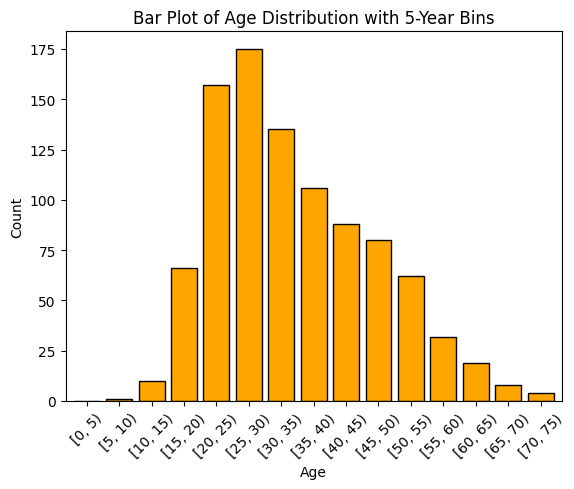

In [63]:
ages = list(user_df["age"])

bin_size = 5
bins = pd.cut(ages, bins=range(0, max(ages) + bin_size, bin_size), right=False)
age_counts = bins.value_counts()

age_counts.sort_index().plot(kind='bar', width=0.8, color='orange', edgecolor='black')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title(f'Bar Plot of Age Distribution with {bin_size}-Year Bins')
plt.xticks(rotation=45)
plt.show()

In [84]:
nomi = pgeocode.Nominatim('us') 
coordinates = [(nomi.query_postal_code(zipcode)['latitude'], nomi.query_postal_code(zipcode)['longitude']) for zipcode in user_df["zip code"]]
print(coordinates[0])

(32.2127, -110.8829)


In [85]:
mymap = folium.Map(location=coordinates[0], zoom_start=5)
for coord in filter(lambda x: not np.isnan(x[0]), coordinates):
    folium.Marker(location=coord, popup=str(coord)).add_to(mymap)
mymap